In [2]:
!pip install --upgrade pip
!pip install pycocotools

In [3]:
import os
from torchvision.datasets import CocoDetection
from torchvision import transforms
from torch.utils.data import DataLoader

# Define paths
coco_root = './content/coco/'
train_images = os.path.join(coco_root, 'train2017')
train_annotations = os.path.join(coco_root, 'annotations/stuff_train2017.json')

In [4]:
train_images

'./content/coco/train2017'

In [5]:
import os
import torch
from torchvision.datasets import CocoDetection
from torchvision import transforms
from torch.utils.data import DataLoader

# Define paths
coco_root = './content/coco/'
train_images = os.path.join(coco_root, 'train2017')
train_annotations = os.path.join(coco_root, 'annotations/stuff_train2017.json')

val_images = os.path.join(coco_root, 'val2017')
val_annotations = os.path.join(coco_root, 'annotations/stuff_val2017.json')

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
    transforms.CenterCrop((256, 256)),  # Ensure all images are exactly 256x256
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load COCO dataset
train_dataset = CocoDetection(root=train_images, annFile=train_annotations, transform=transform)
val_dataset = CocoDetection(root=val_images, annFile=val_annotations, transform=transform)


print("------Train len------", len(train_dataset))
print("------Val len------", len(val_dataset))

# Create DataLoader
#train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True, num_workers=4)

# Custom collate function to handle variable-sized data
def collate_fn(batch):
    images, targets = zip(*batch)
    images = torch.stack(images, dim=0)  # Stack images into a batch
    return images, targets

# Update DataLoader to use the custom collate function
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn
)
val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

# Example: Iterate through the DataLoader
for images, targets in train_loader:
    print(f"Batch size: {len(images)}")
    print(f"First image shape: {images[0].shape}")
    #print(f"First target: {targets[0]}")
    break

# Example: Iterate through the DataLoader
for images, targets in val_loader:
    print(f"Batch size: {len(images)}")
    print(f"First image shape: {images[0].shape}")
    #print(f"First target: {targets[0]}")
    break


#get number of classes from train_loader
num_classes = len(train_loader.dataset.coco.cats)
print(f"Number of classes: {num_classes}")

loading annotations into memory...
Done (t=8.42s)
creating index...
index created!
loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
------Train len------ 118287
------Val len------ 5000
Batch size: 16
First image shape: torch.Size([3, 256, 256])
Batch size: 16
First image shape: torch.Size([3, 256, 256])
Number of classes: 92


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.2739873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.5179958].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping

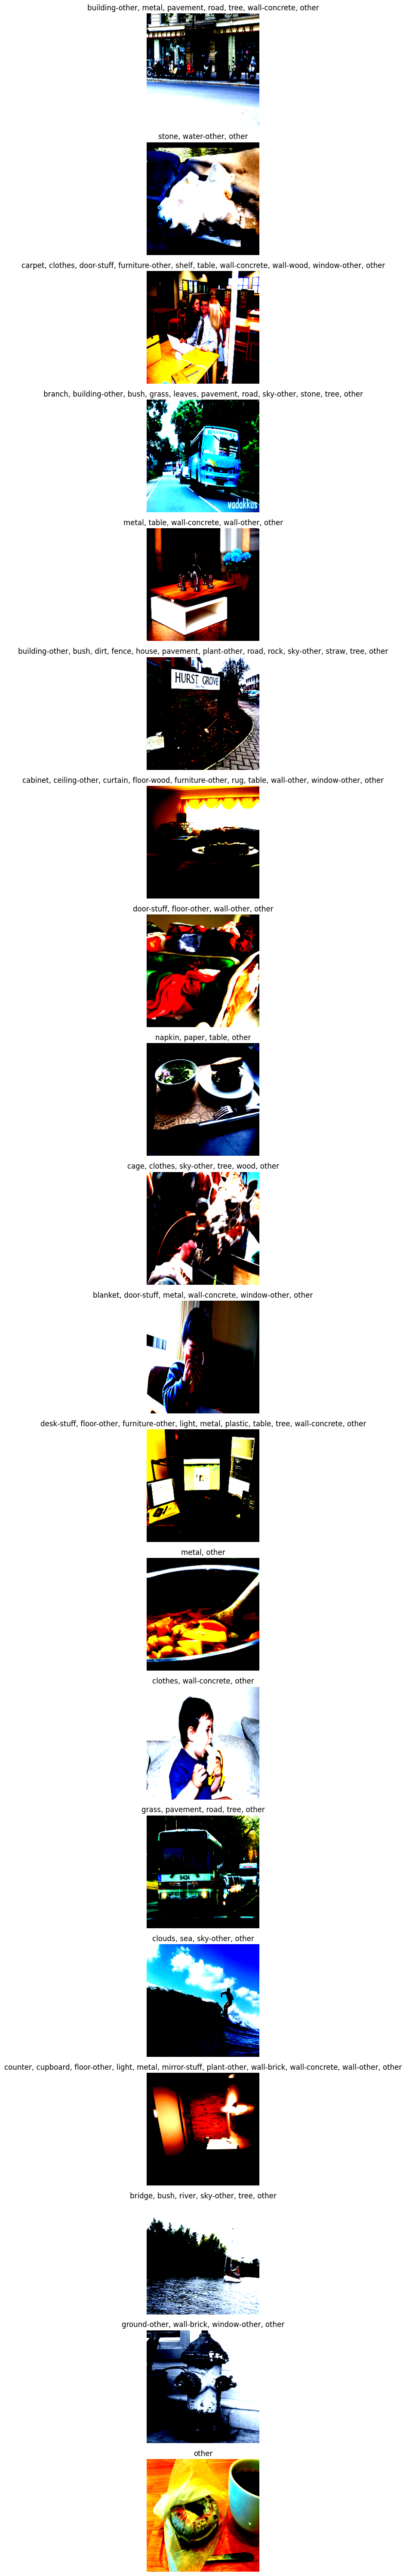

In [13]:
import random
import matplotlib.pyplot as plt

def show_random_images(dataset, num_images=20):
    random_indices = random.sample(range(len(dataset)), num_images)
    plt.figure(figsize=(5, num_images * 3))  # Adjust figure size for vertical stacking
    for i, idx in enumerate(random_indices):
        img, annotations = dataset[idx]  # Get the image (tensor) and annotations
        img = img.permute(1, 2, 0).numpy()  # Convert to channels-last format
        plt.subplot(num_images, 1, i + 1)  # Use a single column layout
        plt.imshow(img)  # Display the image
        if annotations:
            # Extract category names from annotations
            categories = [dataset.coco.cats[ann['category_id']]['name'] for ann in annotations]
            plt.title(", ".join(categories))
        else:
            plt.title("No annotations")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_images(train_dataset, num_images=20)

In [14]:
train_loader.dataset

Dataset CocoDetection
    Number of datapoints: 118287
    Root location: ./content/coco/train2017
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(256, 256))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [16]:
# get list of all classes from train_loader
classes = train_loader.dataset.coco.cats

classes

{92: {'supercategory': 'textile', 'id': 92, 'name': 'banner'},
 93: {'supercategory': 'textile', 'id': 93, 'name': 'blanket'},
 94: {'supercategory': 'plant', 'id': 94, 'name': 'branch'},
 95: {'supercategory': 'building', 'id': 95, 'name': 'bridge'},
 96: {'supercategory': 'building', 'id': 96, 'name': 'building-other'},
 97: {'supercategory': 'plant', 'id': 97, 'name': 'bush'},
 98: {'supercategory': 'furniture-stuff', 'id': 98, 'name': 'cabinet'},
 99: {'supercategory': 'structural', 'id': 99, 'name': 'cage'},
 100: {'supercategory': 'raw-material', 'id': 100, 'name': 'cardboard'},
 101: {'supercategory': 'floor', 'id': 101, 'name': 'carpet'},
 102: {'supercategory': 'ceiling', 'id': 102, 'name': 'ceiling-other'},
 103: {'supercategory': 'ceiling', 'id': 103, 'name': 'ceiling-tile'},
 104: {'supercategory': 'textile', 'id': 104, 'name': 'cloth'},
 105: {'supercategory': 'textile', 'id': 105, 'name': 'clothes'},
 106: {'supercategory': 'sky', 'id': 106, 'name': 'clouds'},
 107: {'sup